In [1]:
from fuzzy_art import *
import sklearn.datasets as ds
import sklearn.decomposition as dcp
import matplotlib.pyplot as plt

In [2]:
iris = ds.load_iris()
data = iris['data'] / np.max(iris['data'], axis=0)
net = FuzzyART(alpha=0.5, rho=0.75)
net.train(data, epochs=100)
print(net.w.shape)

(7, 8)


In [3]:
label_true = iris['target']
label_pred = net.test(data).astype(int)
print(label_true)
print(label_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 3 1 1 4 3 1 1 3 1 3 1 1 1 1 3 3 3 1 1 1 1
 1 1 4 1 1 3 3 3 1 1 1 4 1 3 1 1 1 1 1 3 1 1 1 1 6 1 2 1 5 2 5 5 6 2 4 2 5
 2 5 1 5 5 2 5 5 3 5 1 5 1 5 2 1 1 5 4 2 5 5 1 4 5 5 2 1 5 5 5 1 5 2 5 1 5
 5 1]


In [4]:
pca = dcp.PCA(n_components=2)
pca_xy = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92138578 0.05142129]
[4.9602239  1.17179601]


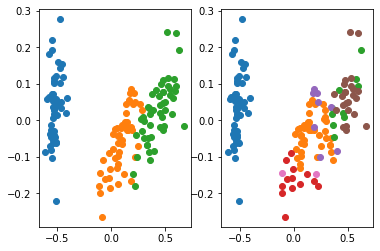

In [5]:
fig, ax = plt.subplots(1, 2)
for cat_true in range(3):
    ax[0].scatter(*np.where(label_true == cat_true, pca_xy.T, None))
for cat_pred in range(net.w.shape[0]):
    ax[1].scatter(*np.where(label_pred == cat_pred, pca_xy.T, None))